# Bessels Correction: Why divide a sample variance by (n-1)?
---
### If you are familiar with basic statistics, you may recall that in order to solve for population variance you must sum up all the squared differences between each data point and the mean, then divide it by number of observations. When finding a *sample variance* to apporximate a population variance, you must divide by (n-1) instead of (n). In this demo we take a look as to why this is.

![Bessel's Correction](sample_standard_deviation.jpg)

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot
from NormalPopulation import NormalPopulation

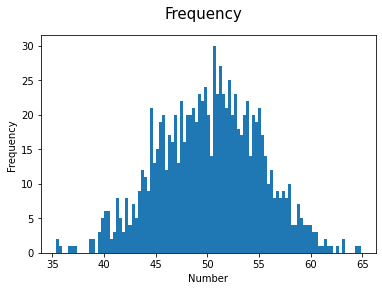

In [2]:
# make Population and graph the density histogram using the Normal Population class. 
n = 1000
mean = 50
stdev = 5
var = stdev**2

NP = NormalPopulation(mean,stdev,n)
NP.plot_population()

In [3]:
#Show population statistics
NP.get_statistics()

aggregate_df = NP.get_samples_mean_variances(num_samples_max = 500 , sample_size=10)
aggregate_df.head()

Population n = 1000
Population Mean = 50.2439617839775
Population Variance = 24.073855943809075
Population Standard Deviation = 4.906511586026173


,Number of Samples,Mean Biased Variance,Mean Unbiased Variance
0,1.0,24.443490,27.159433
1,6.0,22.969787,25.521986
2,11.0,19.400188,21.555764
3,16.0,21.683086,24.092317
4,21.0,22.558727,25.065252


Text(0.5, 0.98, 'Biased Sample Vairances')

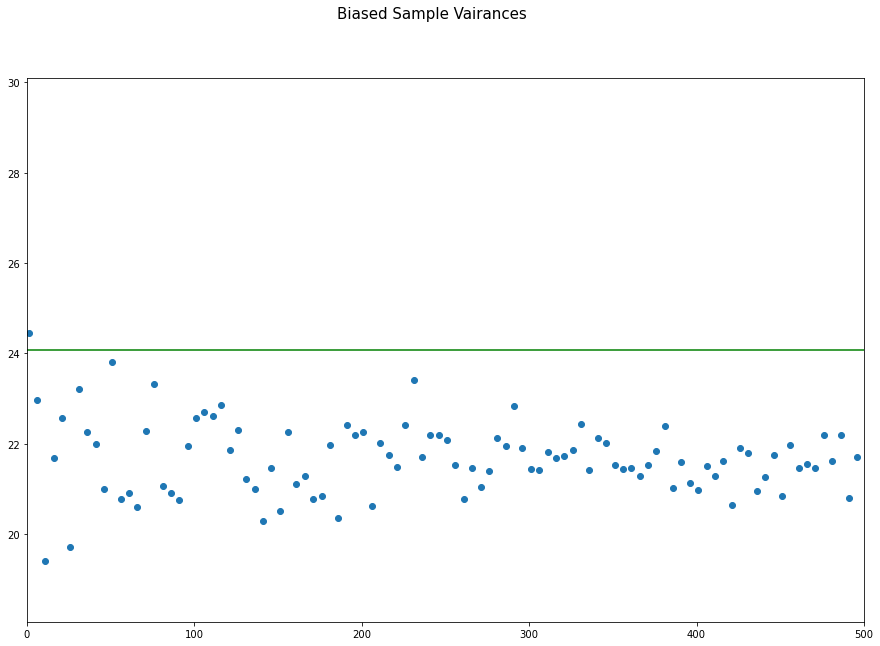

In [4]:
#plot the biased variances
fig = matplotlib.pyplot.figure(figsize = (15,10))
matplotlib.pyplot.scatter(x= aggregate_df["Number of Samples"], y=aggregate_df["Mean Biased Variance"])
matplotlib.pyplot.axhline(y = NP.pop_var, color="green", label ="Population")
matplotlib.pyplot.xlim(0,500)
matplotlib.pyplot.ylim(0.75*NP.pop_var,1.25*NP.pop_var)
fig.suptitle("Biased Sample Vairances", fontsize = 15)

Text(0.5, 0.98, 'Un-Biased Sample Vairances')

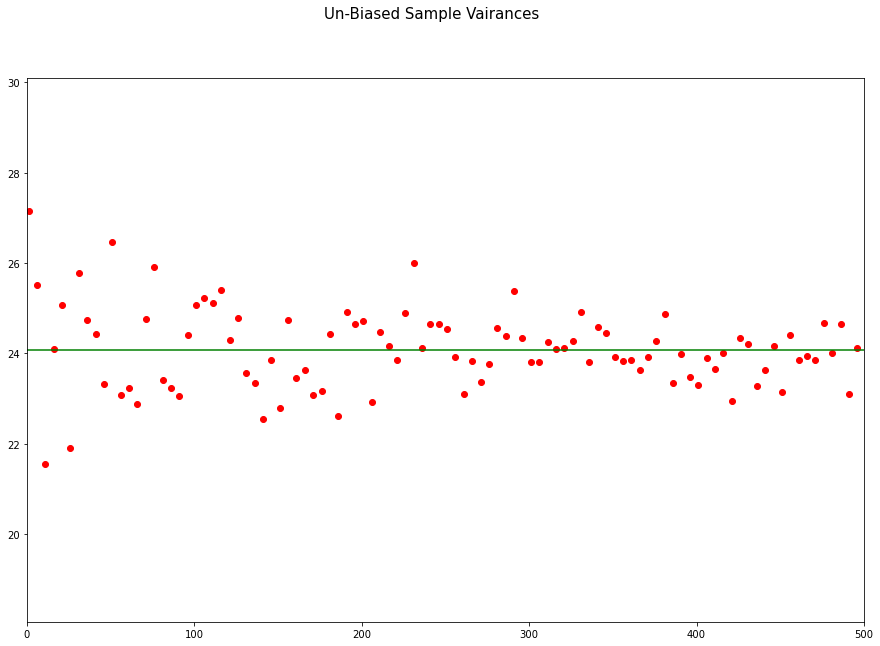

In [5]:
#plot the unbiased varianced
fig = matplotlib.pyplot.figure(figsize = (15,10))
matplotlib.pyplot.scatter(x=aggregate_df["Number of Samples"], y=aggregate_df["Mean Unbiased Variance"], color="red")
matplotlib.pyplot.axhline(y = NP.pop_var, color="green", label ="Population")
matplotlib.pyplot.xlim(0,500)
matplotlib.pyplot.ylim(0.75*NP.pop_var,1.25*NP.pop_var)
fig.suptitle("Un-Biased Sample Vairances", fontsize = 15)

Text(0.5, 0.98, 'Stacked Sample Variances')

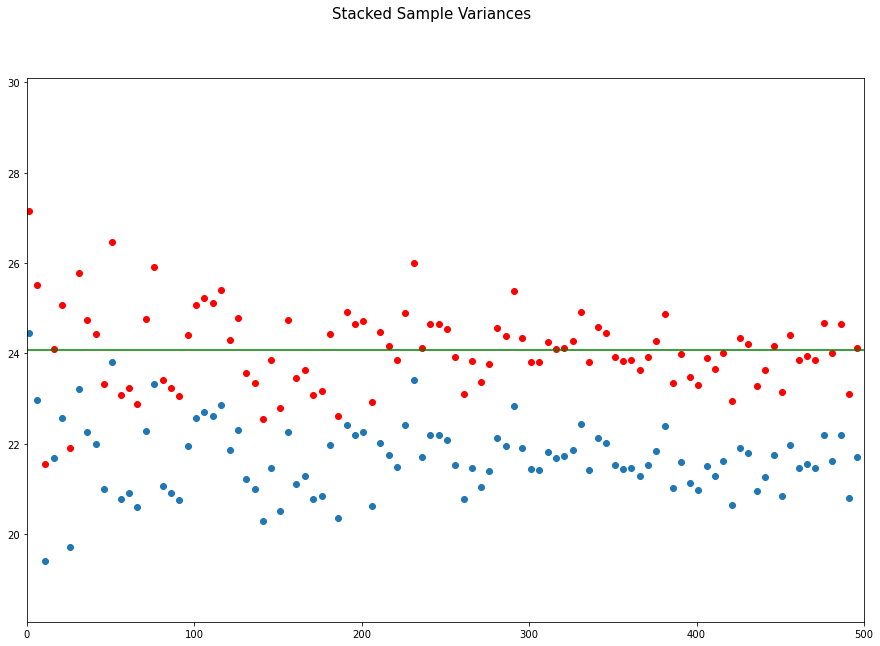

In [7]:
#plot both variances and compare with population variance.
fig = matplotlib.pyplot.figure(figsize = (15,10))
matplotlib.pyplot.scatter(x= aggregate_df["Number of Samples"], y=aggregate_df["Mean Biased Variance"])
matplotlib.pyplot.scatter(x=aggregate_df["Number of Samples"], y=aggregate_df["Mean Unbiased Variance"], color="red")
matplotlib.pyplot.axhline(y = NP.pop_var, color="green", label ="Population")
matplotlib.pyplot.xlim(0,500)
matplotlib.pyplot.ylim(0.75*NP.pop_var,1.25*NP.pop_var)
fig.suptitle("Stacked Sample Variances", fontsize = 15)

## As you can see, the unbiased(n-1) variance, when aggregating a large number of sample variances, produces a very accurate representation of the population variance